<a href="https://colab.research.google.com/github/AndreMSilv/Data-Science/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando base de Dados


In [240]:
import pandas as pd

In [241]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [242]:
dados = pd.read_csv('tips.csv')

In [243]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#tradução

In [244]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [245]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [246]:
gorjetas = dados.rename(columns = renomear)

In [247]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [248]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [249]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [250]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [251]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [252]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [253]:
hora_do_dia = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [254]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


#Importando o Seaborn

In [255]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [256]:
import seaborn as sns

#Analise 1 - Valor da Conta e Gorjeta

<Axes: xlabel='valor_da_conta', ylabel='gorjeta'>

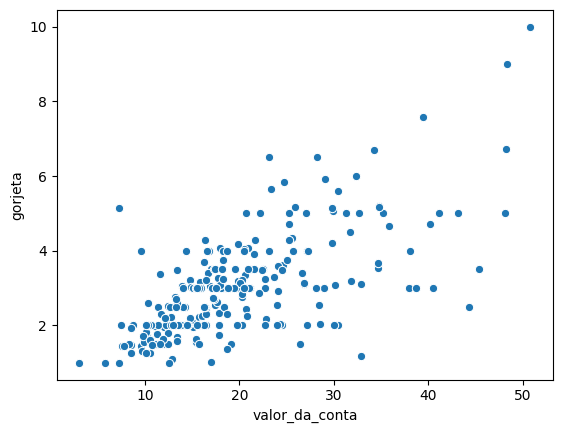

In [257]:
sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

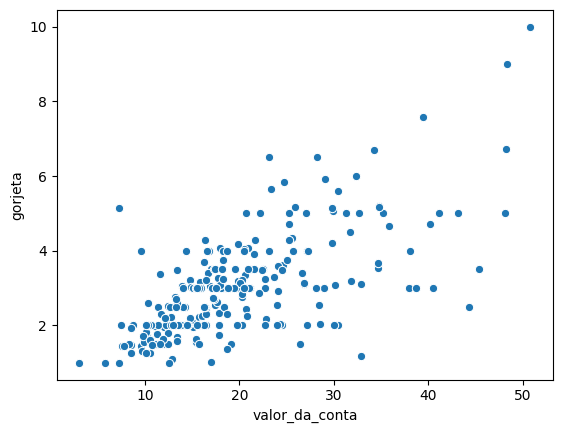

In [258]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

In [259]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))

A base de dados contém 244 registros


In [260]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

In [261]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [262]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Sun,Dinner,2,0.059447
1,10.34,1.66,Não,Sun,Dinner,3,0.160542
2,21.01,3.50,Não,Sun,Dinner,3,0.166587
3,23.68,3.31,Não,Sun,Dinner,2,0.139780
4,24.59,3.61,Não,Sun,Dinner,4,0.146808


In [263]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

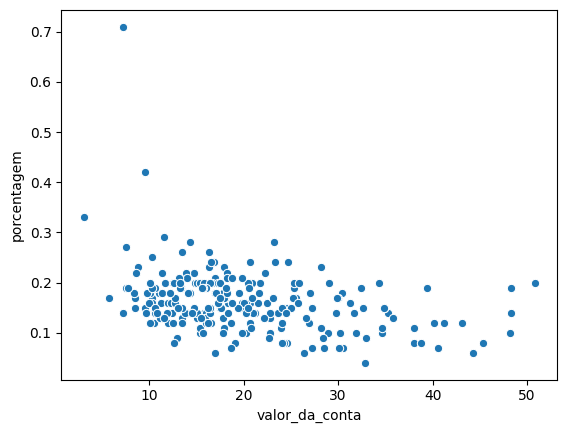

In [264]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente o valor da conta não e proporcional ao valor da gorjeta**

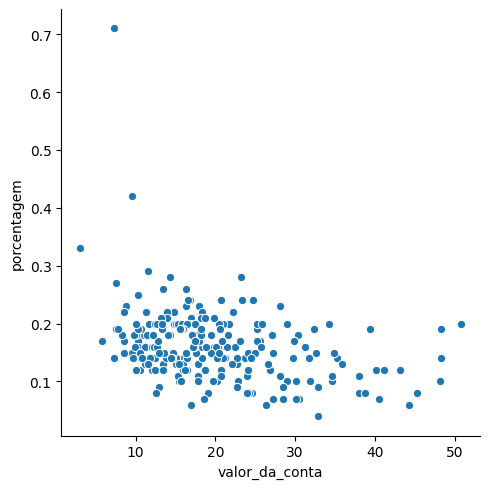

In [265]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

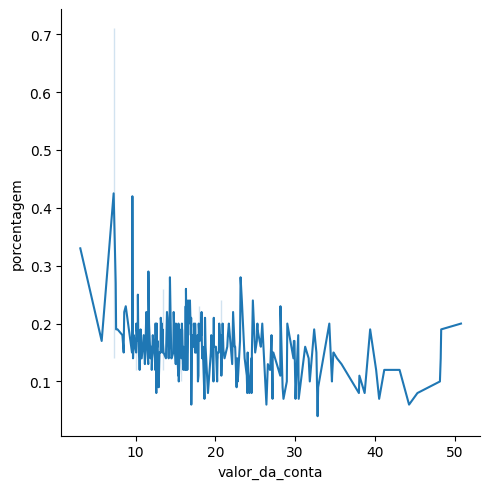

In [266]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

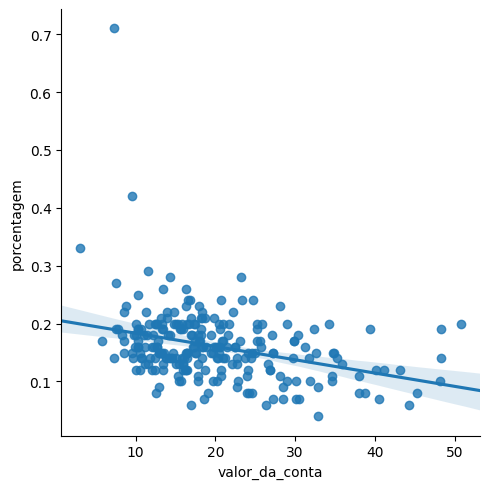

In [267]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#Segunda Analise

In [268]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sat,Dinner,4,0.08
58,11.24,1.76,Sim,Sat,Dinner,2,0.16
60,20.29,3.21,Sim,Sat,Dinner,2,0.16
61,13.81,2.00,Sim,Sat,Dinner,2,0.14
62,11.02,1.98,Sim,Sat,Dinner,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sat,Dinner,2,0.19
236,12.60,1.00,Sim,Sat,Dinner,2,0.08
237,32.83,1.17,Sim,Sat,Dinner,2,0.04
240,27.18,2.00,Sim,Sat,Dinner,2,0.07


In [269]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [270]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


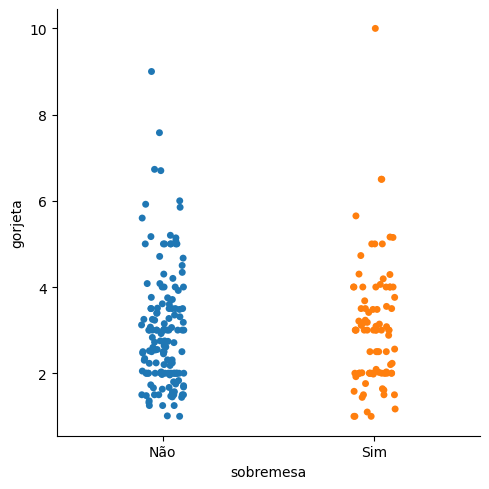

In [271]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

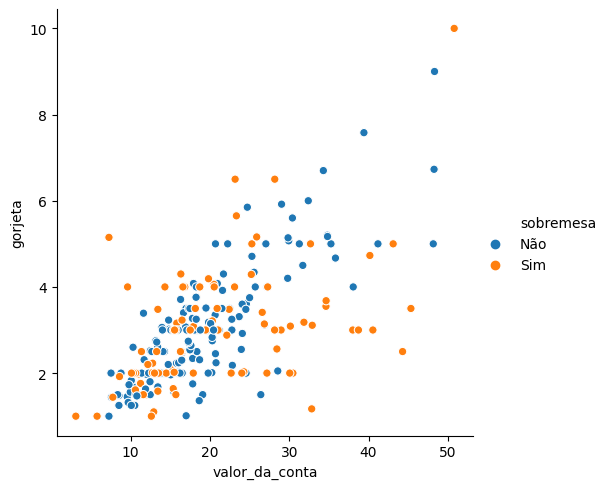

In [272]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

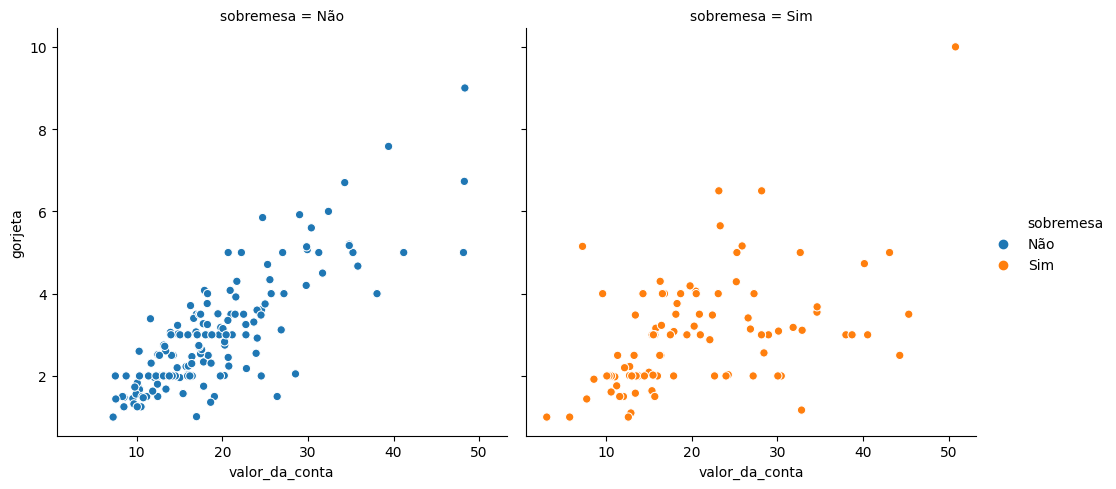

In [273]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

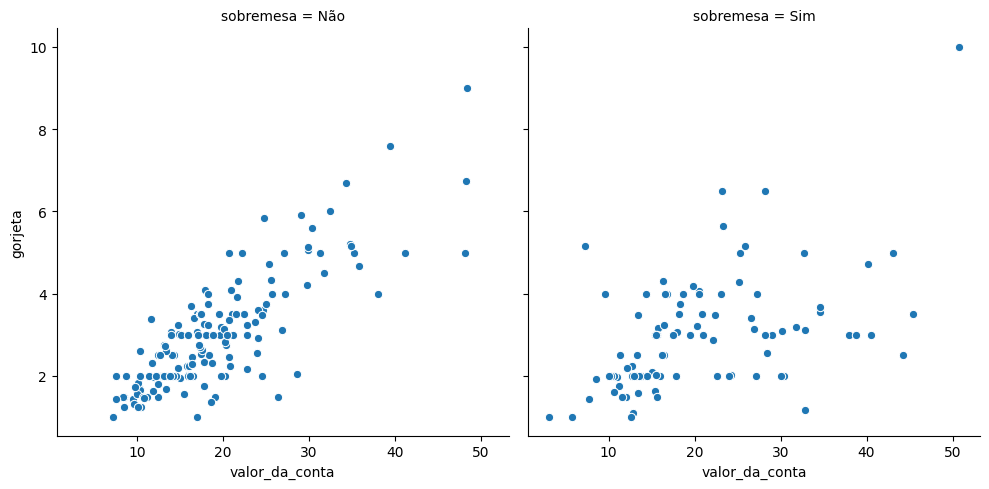

In [274]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

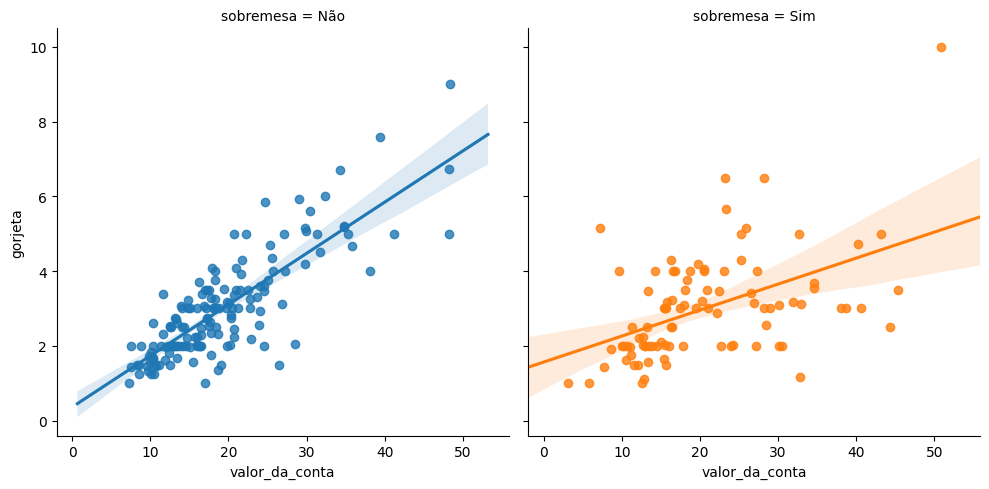

In [275]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

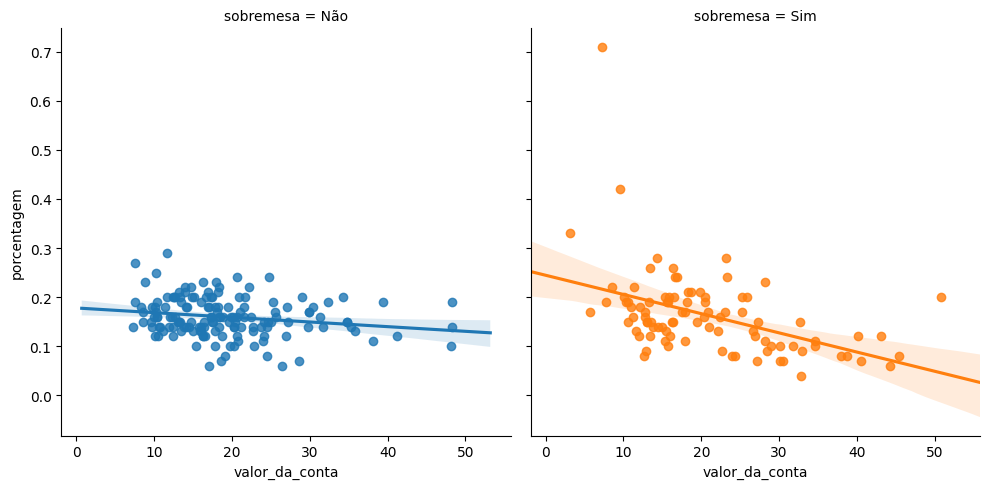

In [276]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

Visualmente existe uma diferença  no valor da gorjeta daqueles que pediram sobremesa e nao pediram sobremesa


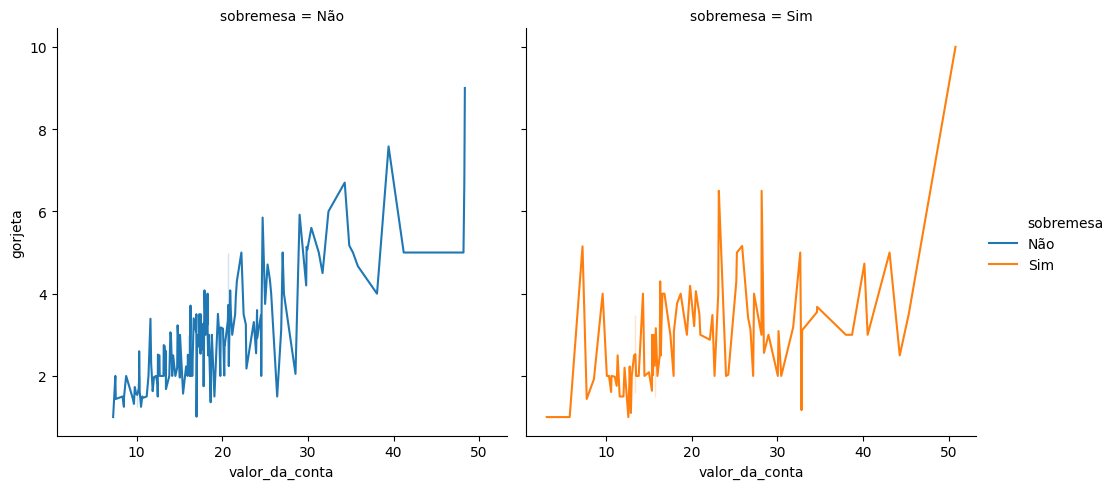

In [277]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

#Teste de Hipotese

**H<sup>null</sup>**
A distribuição da taxa de gorjeta e a mesma nos dois grupos 

**H<sup>alt</sup>**
A distribuição da taxa de gorjeta não e a mesma nos dois grupos 


In [278]:
from scipy.stats import ranksums

In [279]:
gorjetas.query("sobremesa == 'Sim'").porcentagem

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [280]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [281]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [282]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [283]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


# Terceira Analise

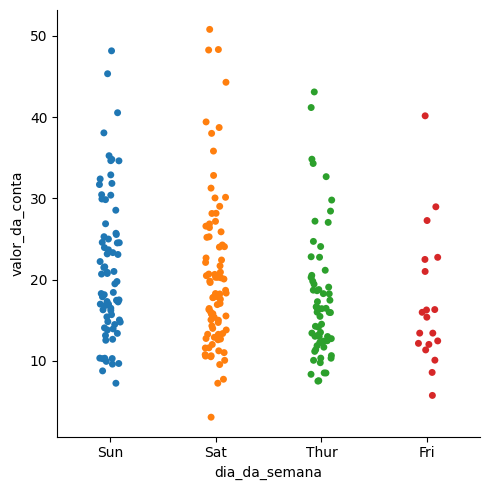

In [284]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

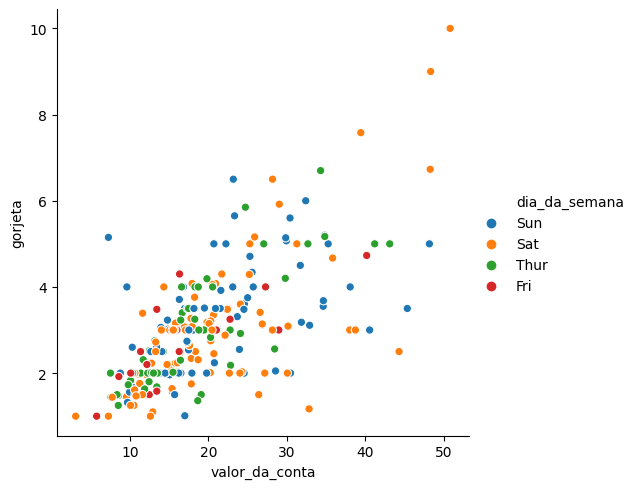

In [285]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

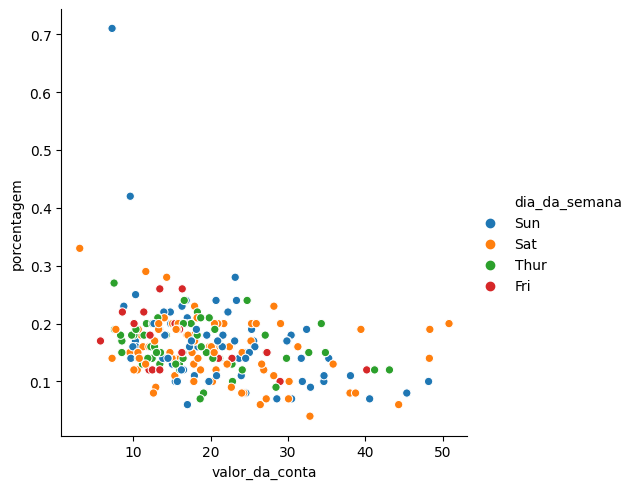

In [286]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

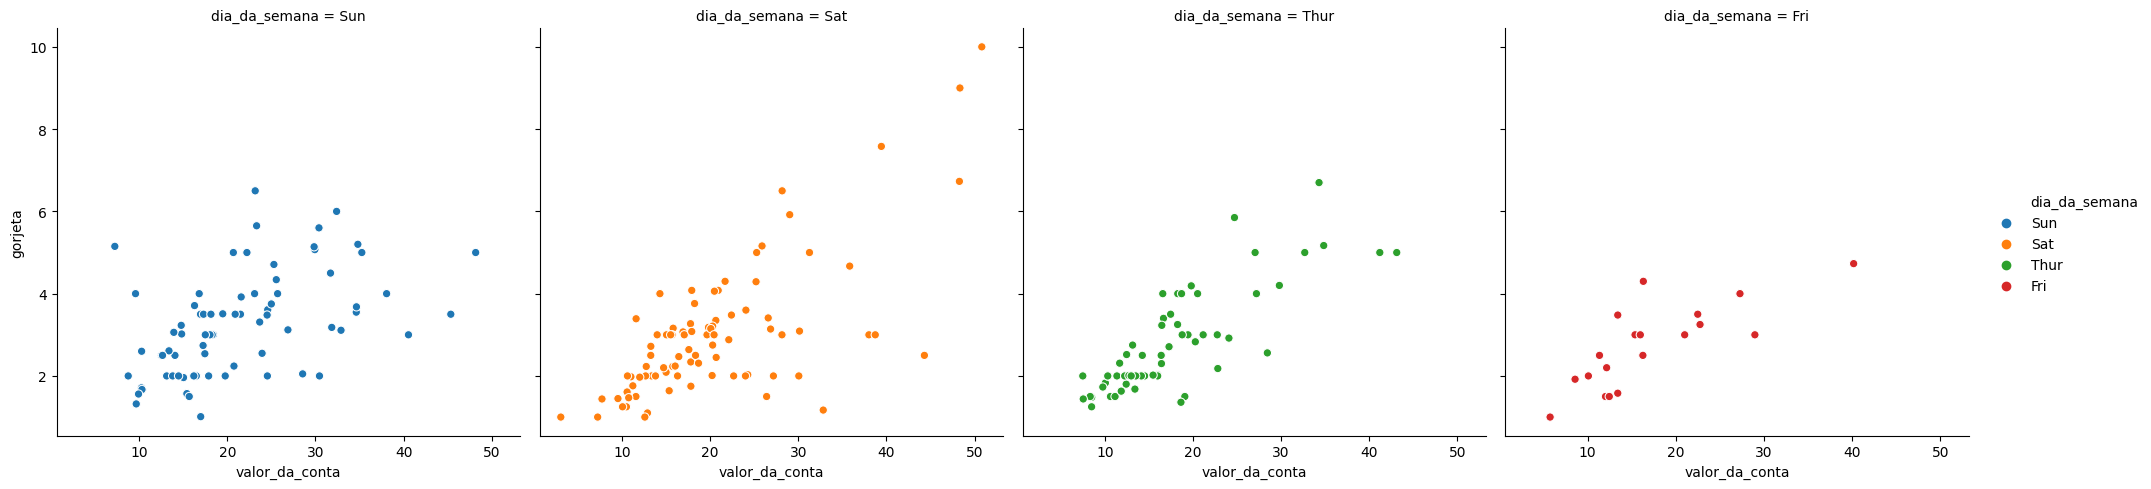

In [287]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

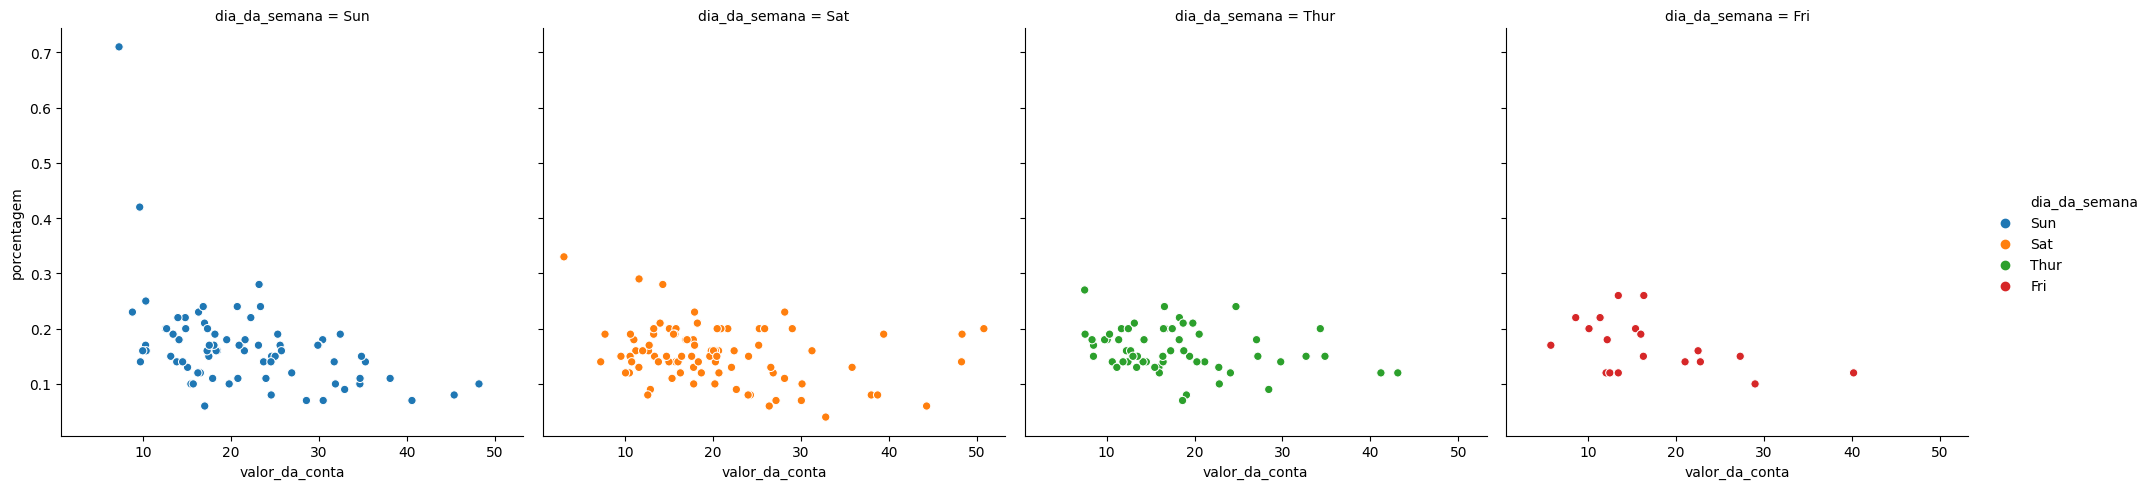

In [288]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

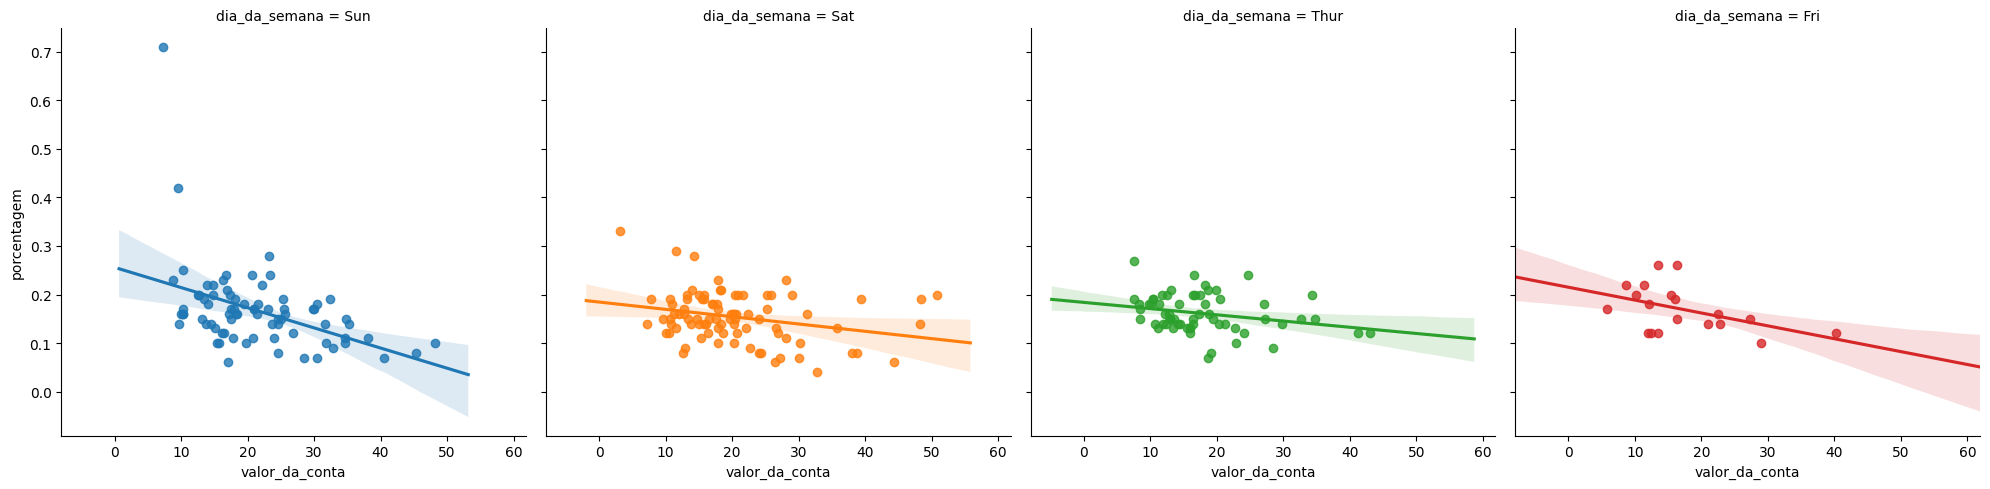

In [289]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

#Análise descritiva

In [290]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [291]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [292]:
gorjetas.groupby(['dia_da_semana']).mean()

<ipython-input-292-dce8bf8e9b0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Fri,17.151579,2.734737,2.105263,0.169474
Sat,20.441379,2.993103,2.517241,0.153678
Sun,21.410000,3.255132,2.842105,0.166974
Thur,17.682742,2.771452,2.451613,0.161129


In [293]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-293-a13207cc9443>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [294]:
gorjetas.dia_da_semana.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: dia_da_semana, dtype: int64

In [295]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sat     87
Sun     76
Thur    62
Fri     19
Name: dia_da_semana, dtype: int64

#Teste de hipótese

**H<sup>null</sup>**
A distribuição do valor da conta é igual no Sabado e no Domingo 

**H<sup>alt</sup>**
A distribuição do valor da conta não é igual no Sabado e no Domingo

In [296]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [297]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [298]:
ranksums(valor_conta_domingo, valor_conta_sabado)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8504: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

In [299]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é nan


#Distplot, boxplot e violinplot

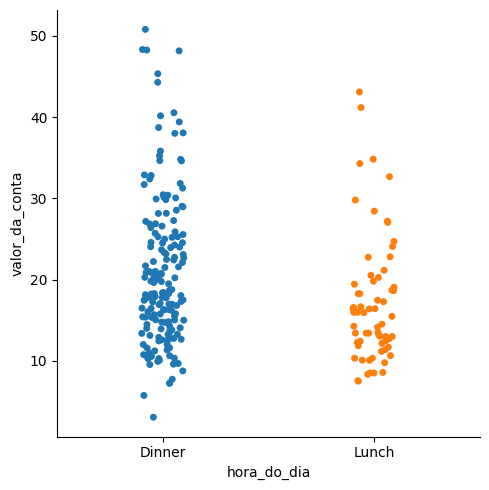

In [300]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

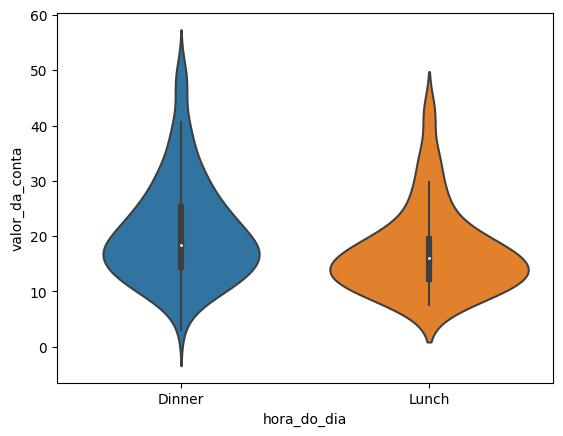

In [301]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

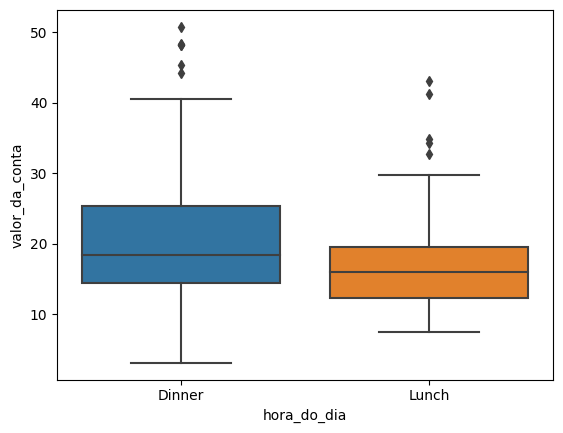

In [302]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [303]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<Axes: xlabel='valor_da_conta'>

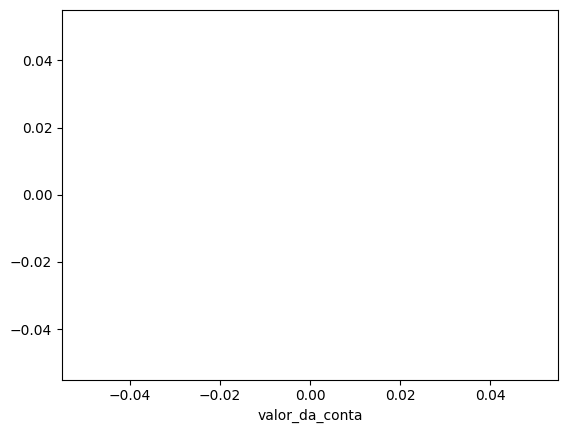

In [304]:
sns.distplot(almoco)

<Axes: xlabel='valor_da_conta'>

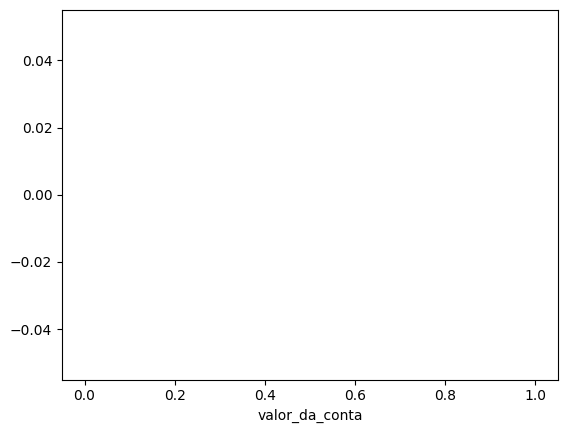

In [305]:
sns.distplot(almoco, kde=False)

In [306]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<Axes: xlabel='valor_da_conta'>

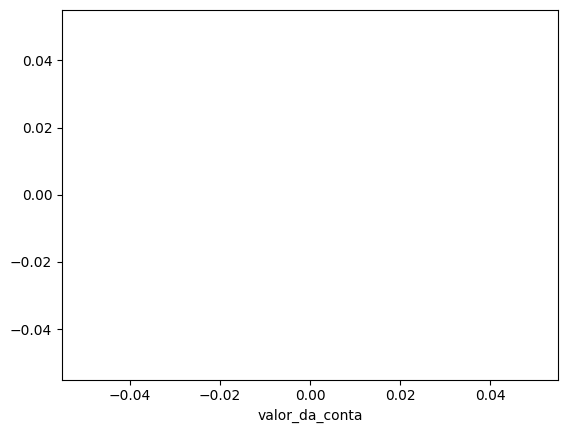

In [307]:
sns.distplot(jantar)

<Axes: xlabel='valor_da_conta'>

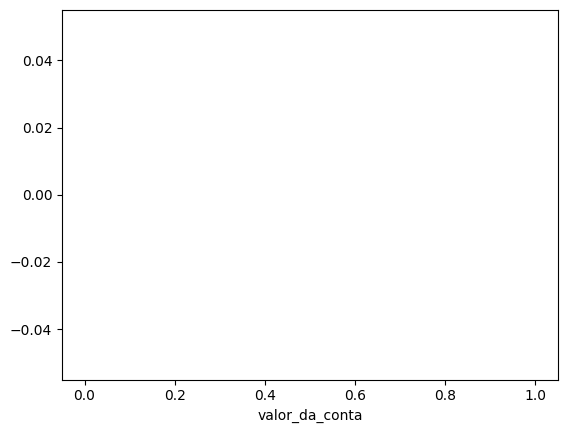

In [308]:
sns.distplot(jantar, kde=False)

<Axes: xlabel='valor_da_conta'>

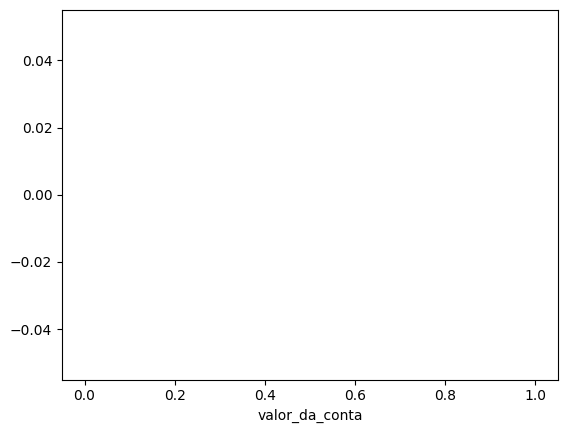

In [309]:
sns.distplot(jantar, kde=False)

##Teste de hipótese 2

In [310]:
gorjetas.groupby(['hora_do_dia']).mean()

<ipython-input-310-28777fd19231>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Dinner,20.797159,3.102670,2.630682,0.159773
Lunch,17.168676,2.728088,2.411765,0.163971


In [311]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-311-f114a0c0b279>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


In [312]:
r2 = ranksums(jantar, almoco)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8504: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


In [313]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [314]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [315]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=nan, pvalue=nan)

In [316]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de nan
